# Exploratory Data Analysis

<b>Overview</b>:<br>
I perform Exploratory Data Analysis with the help of Pandas, matplotlib, and seaborn. Tasks involve getting to know your data, lightly cleaning data, exploring the data through univariate and bivariate analysis, dealing with missing/duplicate data, correlation analysis, and visualizing your data. 

Link to dataset: https://www.kaggle.com/aungpyaeap/supermarket-sales

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('supermarket_sales.csv')

In [4]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7.0,26.1415,548.9715,1/5/19,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5.0,3.8200,80.2200,3/8/19,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7.0,16.2155,340.5255,3/3/19,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8.0,23.2880,489.0480,1/27/19,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7.0,30.2085,634.3785,2/8/19,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [5]:
df.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                   float64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

# Data Cleaning

In [6]:
df['Date'] = pd.to_datetime(df['Date'])

In [7]:
df.dtypes

Invoice ID                         object
Branch                             object
City                               object
Customer type                      object
Gender                             object
Product line                       object
Unit price                        float64
Quantity                          float64
Tax 5%                            float64
Total                             float64
Date                       datetime64[ns]
Time                               object
Payment                            object
cogs                              float64
gross margin percentage           float64
gross income                      float64
Rating                            float64
dtype: object

In [8]:
df.set_index('Date', inplace=True)

In [9]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,gross margin percentage,gross income,Rating
Date,,,,,,,,,,,,,,,,
2019-01-05,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7.0,26.1415,548.9715,13:08,Ewallet,522.83,4.761905,26.1415,9.1
2019-03-08,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5.0,3.8200,80.2200,10:29,Cash,76.40,4.761905,3.8200,9.6
2019-03-03,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7.0,16.2155,340.5255,13:23,Credit card,324.31,4.761905,16.2155,7.4
2019-01-27,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8.0,23.2880,489.0480,20:33,Ewallet,465.76,4.761905,23.2880,8.4
2019-02-08,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7.0,30.2085,634.3785,10:37,Ewallet,604.17,4.761905,30.2085,5.3


# Data Exploration

In [10]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,996.000000,983.000000,1003.000000,1003.000000,1003.000000,1.003000e+03,1003.000000,1003.000000
mean,55.764568,5.501526,15.400368,323.407726,308.007358,4.761905e+00,15.400368,6.972682
std,26.510165,2.924673,11.715192,246.019028,234.303836,6.220351e-14,11.715192,1.717647
min,10.080000,1.000000,0.508500,10.678500,10.170000,4.761905e+00,0.508500,4.000000
25%,33.125000,3.000000,5.894750,123.789750,117.895000,4.761905e+00,5.894750,5.500000
50%,55.420000,5.000000,12.096000,254.016000,241.920000,4.761905e+00,12.096000,7.000000
75%,78.085000,8.000000,22.539500,473.329500,450.790000,4.761905e+00,22.539500,8.500000
max,99.960000,10.000000,49.650000,1042.650000,993.000000,4.761905e+00,49.650000,10.000000


<b>Question 1</b>: What does the distribution of customer ratings look like? Is it skewed?

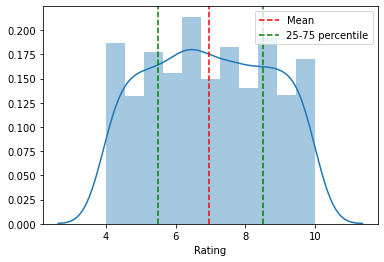

In [11]:
sns.distplot(df['Rating'])
plt.axvline(x=np.mean(df['Rating']), c='red', ls ='--',label = 'Mean')
plt.axvline(x=np.percentile(df['Rating'],25), c='green', ls='--', label = '25-75 percentile')
plt.axvline(x=np.percentile(df['Rating'],75), c='green', ls='--')
plt.legend()

<b>Question 2</b>: Do aggregate sales numbers differ by much between branches?

In [12]:
df.head(2)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,gross margin percentage,gross income,Rating
Date,,,,,,,,,,,,,,,,
2019-01-05,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7.0,26.1415,548.9715,13:08,Ewallet,522.83,4.761905,26.1415,9.1
2019-03-08,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5.0,3.8200,80.2200,10:29,Cash,76.40,4.761905,3.8200,9.6


Create Sales Column

In [13]:
df['Sales'] = df['Unit price'] * df['Quantity']

In [14]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,gross margin percentage,gross income,Rating,Sales
Date,,,,,,,,,,,,,,,,,
2019-01-05,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7.0,26.1415,548.9715,13:08,Ewallet,522.83,4.761905,26.1415,9.1,522.83
2019-03-08,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5.0,3.8200,80.2200,10:29,Cash,76.40,4.761905,3.8200,9.6,76.40
2019-03-03,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7.0,16.2155,340.5255,13:23,Credit card,324.31,4.761905,16.2155,7.4,324.31
2019-01-27,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8.0,23.2880,489.0480,20:33,Ewallet,465.76,4.761905,23.2880,8.4,465.76
2019-02-08,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7.0,30.2085,634.3785,10:37,Ewallet,604.17,4.761905,30.2085,5.3,604.17


In [15]:
df.groupby('Branch')['Sales'].sum()

Branch
A    100382.55
B     96638.84
C    104486.08
Name: Sales, dtype: float64

In [16]:
df['Branch'].value_counts()

A    342
B    333
C    328
Name: Branch, dtype: int64

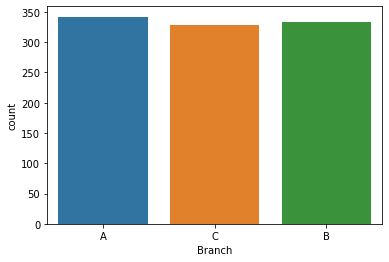

In [17]:
sns.countplot(df['Branch'])

<b>Question 3</b>: Is there a relationship between gross income and customer ratings? Branch and gross income? Gender and gross income?

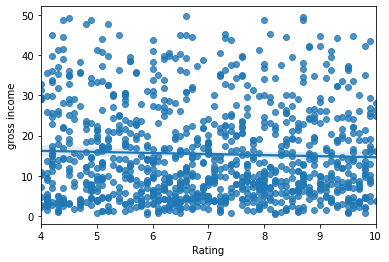

In [18]:
sns.regplot(x='Rating', y='gross income', data=df)

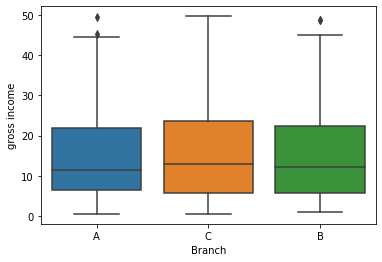

In [19]:
sns.boxplot(x='Branch', y='gross income', data=df)

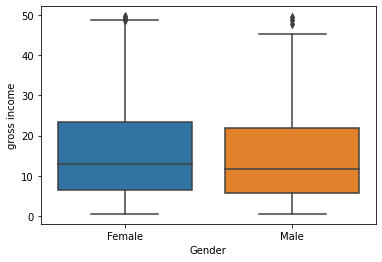

In [20]:
sns.boxplot(x='Gender', y='gross income', data=df)

<b>Question 4</b>: Is there a noticeable time trend in gross income

In [21]:
df.groupby(df.index).mean()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Sales
Date,,,,,,,,,
2019-01-01,54.995833,6.454545,18.830083,395.431750,376.601667,4.761905,18.830083,6.583333,333.901818
2019-01-02,44.635000,6.000000,11.580375,243.187875,231.607500,4.761905,11.580375,6.050000,231.607500
2019-01-03,59.457500,4.625000,12.369813,259.766062,247.396250,4.761905,12.369813,8.112500,247.396250
2019-01-04,51.743333,5.333333,12.886417,270.614750,257.728333,4.761905,12.886417,6.516667,257.728333
2019-01-05,61.636667,4.583333,14.034458,294.723625,280.689167,4.761905,14.034458,7.433333,280.689167
...,...,...,...,...,...,...,...,...,...
2019-03-26,42.972308,4.000000,7.188692,150.962538,143.773846,4.761905,7.188692,6.623077,143.773846
2019-03-27,56.841000,4.500000,13.822950,290.281950,276.459000,4.761905,13.822950,6.760000,276.459000
2019-03-28,45.525000,4.800000,10.616200,222.940200,212.324000,4.761905,10.616200,7.050000,212.324000


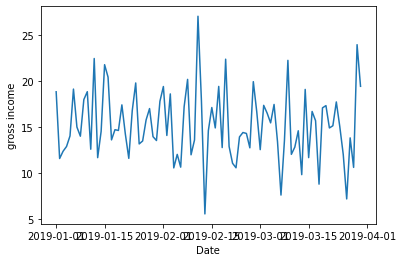

In [22]:
sns.lineplot(x=df.groupby(df.index).mean().index, 
             y=df.groupby(df.index).mean()['gross income'])

# Dealing with Duplicate Rows and Missing Values

In [23]:
df.duplicated().sum()

3

In [24]:
df[df.duplicated()==True]

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,gross margin percentage,gross income,Rating,Sales
Date,,,,,,,,,,,,,,,,,
2019-02-18,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7.0,30.919,649.299,13:28,Cash,618.38,4.761905,30.919,6.6,618.38
2019-03-10,745-74-0715,A,Yangon,Normal,Male,Electronic accessories,NaN,2.0,5.803,121.863,20:46,Ewallet,116.06,4.761905,5.803,8.8,NaN
2019-01-26,452-04-8808,B,Mandalay,Normal,Male,Electronic accessories,87.08,NaN,30.478,640.038,15:17,Cash,609.56,4.761905,30.478,5.5,NaN


In [25]:
df.drop_duplicates(inplace=True)

In [26]:
df.isna().sum()

Invoice ID                  0
Branch                      0
City                        0
Customer type              79
Gender                      0
Product line               43
Unit price                  6
Quantity                   19
Tax 5%                      0
Total                       0
Time                        0
Payment                     0
cogs                        0
gross margin percentage     0
gross income                0
Rating                      0
Sales                      25
dtype: int64

In [27]:
df.fillna(df.mean(), inplace=True)

In [28]:
df.isna().sum()

Invoice ID                  0
Branch                      0
City                        0
Customer type              79
Gender                      0
Product line               43
Unit price                  0
Quantity                    0
Tax 5%                      0
Total                       0
Time                        0
Payment                     0
cogs                        0
gross margin percentage     0
gross income                0
Rating                      0
Sales                       0
dtype: int64

In [29]:
df.fillna(df.mode().iloc[0], inplace=True)

In [30]:
df.isna().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
Sales                      0
dtype: int64

In [31]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,gross margin percentage,gross income,Rating,Sales
Date,,,,,,,,,,,,,,,,,
2019-01-05,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7.0,26.1415,548.9715,13:08,Ewallet,522.83,4.761905,26.1415,9.1,522.83
2019-03-08,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5.0,3.8200,80.2200,10:29,Cash,76.40,4.761905,3.8200,9.6,76.40
2019-03-03,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7.0,16.2155,340.5255,13:23,Credit card,324.31,4.761905,16.2155,7.4,324.31
2019-01-27,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8.0,23.2880,489.0480,20:33,Ewallet,465.76,4.761905,23.2880,8.4,465.76
2019-02-08,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7.0,30.2085,634.3785,10:37,Ewallet,604.17,4.761905,30.2085,5.3,604.17


# Correlation Analysis

In [34]:
np.round(df.corr(),2)

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Sales
Unit price,1.00,0.01,0.63,0.63,0.63,-0.0,0.63,-0.01,0.63
Quantity,0.01,1.00,0.70,0.70,0.70,-0.0,0.70,-0.02,0.70
Tax 5%,0.63,0.70,1.00,1.00,1.00,0.0,1.00,-0.04,0.99
Total,0.63,0.70,1.00,1.00,1.00,0.0,1.00,-0.04,0.99
cogs,0.63,0.70,1.00,1.00,1.00,0.0,1.00,-0.04,0.99
gross margin percentage,-0.00,-0.00,0.00,0.00,0.00,1.0,0.00,0.00,0.00
gross income,0.63,0.70,1.00,1.00,1.00,0.0,1.00,-0.04,0.99
Rating,-0.01,-0.02,-0.04,-0.04,-0.04,0.0,-0.04,1.00,-0.03
Sales,0.63,0.70,0.99,0.99,0.99,0.0,0.99,-0.03,1.00


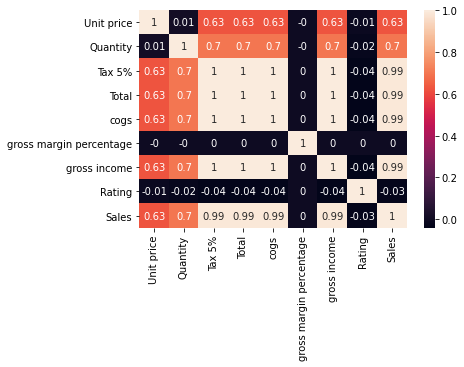

In [36]:
sns.heatmap(np.round(df.corr(),2), annot=True)